In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
LOADING OF THE DATASET AND DATA QUALITY CHECKS
CHECKING FOR MISSING VALUES OR NON-NUMERIC DATA

In [21]:
# Loading of  the data
df = pd.read_excel("datapoint.xlsx")


print(df.isnull().sum())
print(df.dtypes)

kwh            0
air_temp       0
dew_temp       0
square_feet    0
year_built     0
dtype: int64
kwh            float64
air_temp       float64
dew_temp       float64
square_feet     object
year_built      object
dtype: object


DATA PREPROCESSING
DROPING ROWS WITH MISSING VALUES OR HANDLE THEM ACCORDINGLY

In [22]:


df = df.dropna()

# Converting data to the correct type if necessary
df['air_temp'] = pd.to_numeric(df['air_temp'], errors='coerce')
df['dew_temp'] = pd.to_numeric(df['dew_temp'], errors='coerce')
df['square_feet'] = pd.to_numeric(df['square_feet'], errors='coerce')
df['kwh'] = pd.to_numeric(df['kwh'], errors='coerce')

df = df.dropna()

FEATURES SELECTION INCLUDING INPUT VARIABLES AND TARGET VARIABLE
MODEL TRAINING
MODEL PERFORMANCE EVALUATION

In [23]:
# Defining the features and target variable
data_x = df[['air_temp', 'dew_temp', 'square_feet']]
data_y = df['kwh']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Training of the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# model performance Evaluation 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 40.90878777834679
Root Mean Squared Error (RMSE): 6.39599779380409
Mean Absolute Error (MAE): 4.975955186427731
R-squared: 0.005025000877986074


RESULT VISUALIZATION

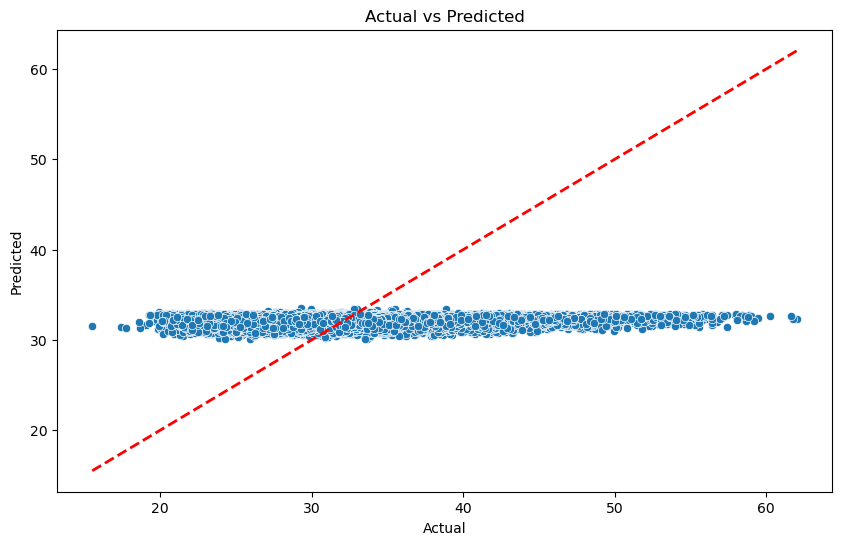

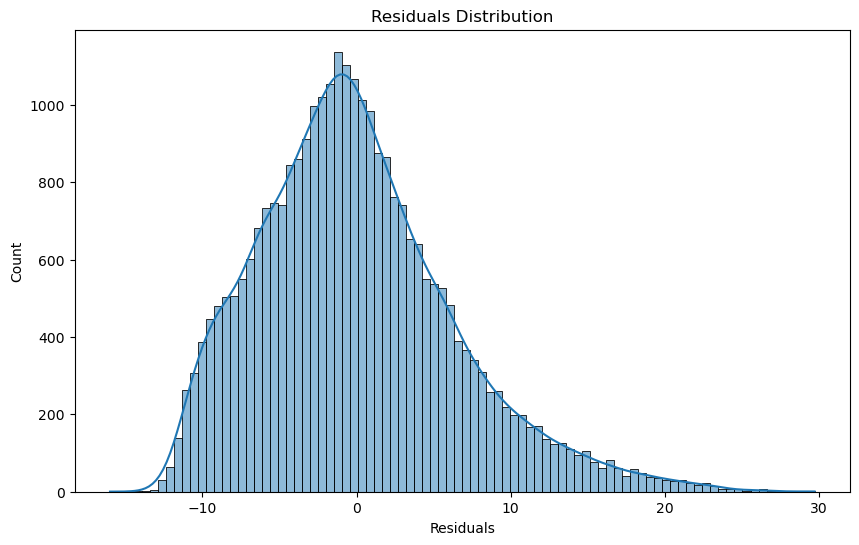

In [24]:


# Visualization
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()
